# Conteo, frecuencias

In [4]:
if (!require('gutenbergr')) install.packages('gutenbergr'); library('gutenbergr')
if (!require('dplyr')) install.packages('dplyr'); library('dplyr')
if (!require('tidytext')) install.packages('tidytext'); library('tidytext')

In [5]:
libro = gutenberg_download(c(345))

In [6]:
tail(libro, 100)

gutenberg_id,text
<int>,<chr>
345,"authentic document; nothing but a mass of typewriting, except the later"
345,"note-books of Mina and Seward and myself, and Van Helsing's memorandum."
345,"We could hardly ask any one, even did we wish to, to accept these as"
345,"proofs of so wild a story. Van Helsing summed it all up as he said, with"
345,our boy on his knee:--
345,
345,"""We want no proofs; we ask none to believe us! This boy will some day"
345,know what a brave and gallant woman his mother is. Already he knows her
345,sweetness and loving care; later on he will understand how some men so


Hay una sección de erratas y otros datos que se escapan del contenido del libro, por lo que se procederá a eliminarlos, lo que sucede a partir de la línea que contienen "THE END".

In [7]:
t = grep("THE END", libro$text) # línea donde se termina el libro

libro2 = libro[1:t, ]

In [8]:
tail(libro2)

gutenberg_id,text
<int>,<chr>
345,sweetness and loving care; later on he will understand how some men so
345,"loved her, that they did dare much for her sake."""
345,
345,JONATHAN HARKER.
345,
345,THE END


Ahora se procede a extraer los caracteres usados y las palabras completas.

In [9]:
letras = libro2 %>% unnest_tokens(letras, text, "characters")
head(letras)

gutenberg_id,letras
<int>,<chr>
345,d
345,r
345,a
345,c
345,u
345,l


In [10]:
palabras = libro2 %>% unnest_tokens(word, text, "words")
head(palabras)

gutenberg_id,word
<int>,<chr>
345,dracula
345,dracula
345,_by_
345,bram
345,stoker
345,illustration


El conteo de letras y palabras puede extraerse mediante la función `table`

In [11]:
t_letras = table(letras)
t_palabras = table(palabras)

Para poder graficar los diagramas de frecuencias, ambas se convierten a `data.frame`.

In [12]:
df_letras = as.data.frame(t_letras)
df_palabras = as.data.frame(t_palabras)

head(df_letras)
head(df_palabras)

,gutenberg_id,letras,Freq
,<fct>,<fct>,<int>
1,345,0,44
2,345,1,119
3,345,2,101
4,345,3,60
5,345,4,41
6,345,5,38


,gutenberg_id,word,Freq
,<fct>,<fct>,<int>
1,345,_1,13
2,345,_10,3
3,345,_11,5
4,345,_12,4
5,345,_13,2
6,345,_14,1


En ambos, la primera columna indica el índice del libro en el sitio Project Gutemberg, así que se eliminará.

In [13]:
# https://stackoverflow.com/a/6286336/3113008
df_letras$gutenberg_id <- NULL
df_palabras$gutenberg_id <- NULL

Ahora se ordenan de manera descendiente por frecuencia.

In [14]:
s_letras = df_letras[order(-df_letras$Freq), ]
s_palabras = df_palabras[order(-df_palabras$Freq), ]

head(s_letras)
head(s_palabras)

,letras,Freq
,<fct>,<int>
15,e,79735
30,t,58469
11,a,52682
25,o,50577
24,n,43841
18,h,43487


,word,Freq
,<fct>,<int>
8494,the,7882
531,and,5905
4314,i,4798
8627,to,4659
5772,of,3614
247,a,2946


Por último se grafican los resultados.

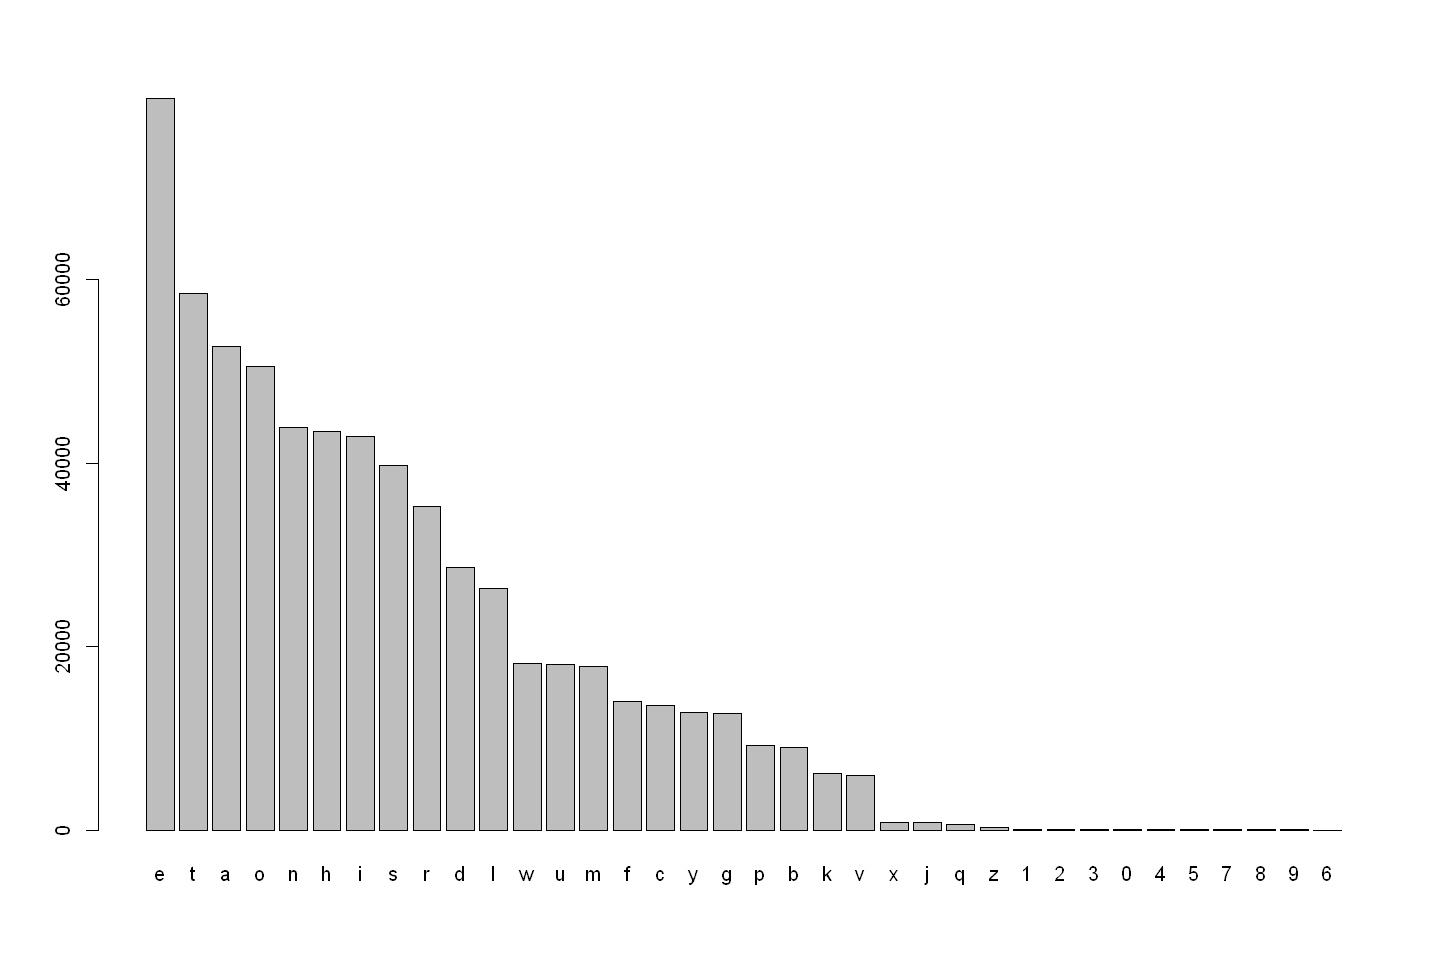

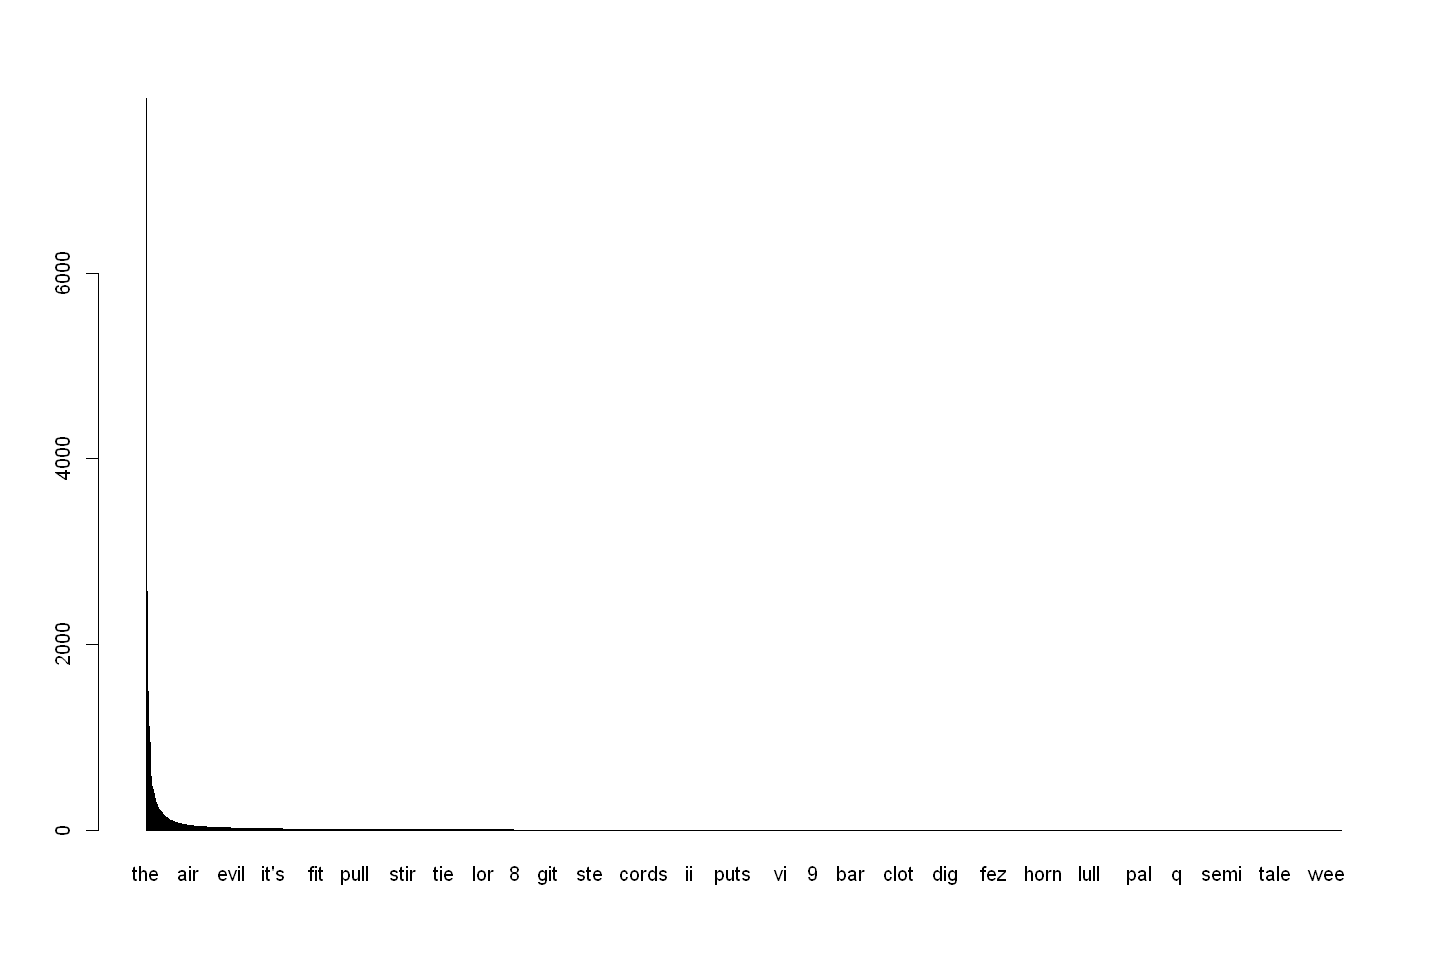

In [15]:
library(repr)
options(repr.plot.width=12, repr.plot.height=8)

barplot(s_letras$Freq, names = s_letras$letras)
barplot(s_palabras$Freq, names = s_palabras$word)

De esto podríamos decir que la letra *e* es la más usada en este libro y que el artículo *the*¨también lo es, pero esto no agrega mucho al entendimiento de la estructura del libro en sí. Existe un término denominado *palabras vacías* (o *stop words* en ingl+es) que se refiere a palabras que en un idioma carecen de significado fuera de contexto (más información [aquí](https://googleseo.marketing/seo-que-son-stop-words-palabras-vacias/)). En español se incluyen todos las preposiciones, artículos y adverbios. Una lista más detallada se halla en (esta página)[https://googleseo.marketing/lista-de-stop-words-o-palabras-vacias-en-espanol/]. Al eliminar estas palabras, se obtendría una lista de palabras más significativas.

Primero se carga la librería `stopwords` (también existe la opción de `tidytext` pero la librería de `stopwords` posee más opciones para filtrar palabras) y se guardan las palabras vacías del inglés.

In [16]:
 #head(s_palabras %>% anti_join(stop_words), 20)

In [17]:
if (!require('stopwords')) install.packages('stopwords'); library('stopwords')

Loading required package: stopwords



In [18]:
sw = stopwords::stopwords("en", source = "stopwords-iso")
head(sw)

[1] "'ll"   "'tis"  "'twas" "'ve"   "10"    "39"

Ahora se eliminan de la lista de letras.

In [19]:
sw_palabras = s_palabras[!(s_palabras$word %in% sw), ]
head(sw_palabras, 20)

,word,Freq
,<fct>,<int>
8607,time,390
9038,van,323
5628,night,310
4097,helsing,301
5085,lucy,223
2241,day,220
3942,hand,210
5338,mina,210
2633,door,200


Finalmente se puede generar una nube de palabras con estos resultados y la librería `wordcloud`.

In [20]:
if (!require('wordcloud')) install.packages('wordcloud'); library('wordcloud')

Loading required package: wordcloud

Loading required package: RColorBrewer



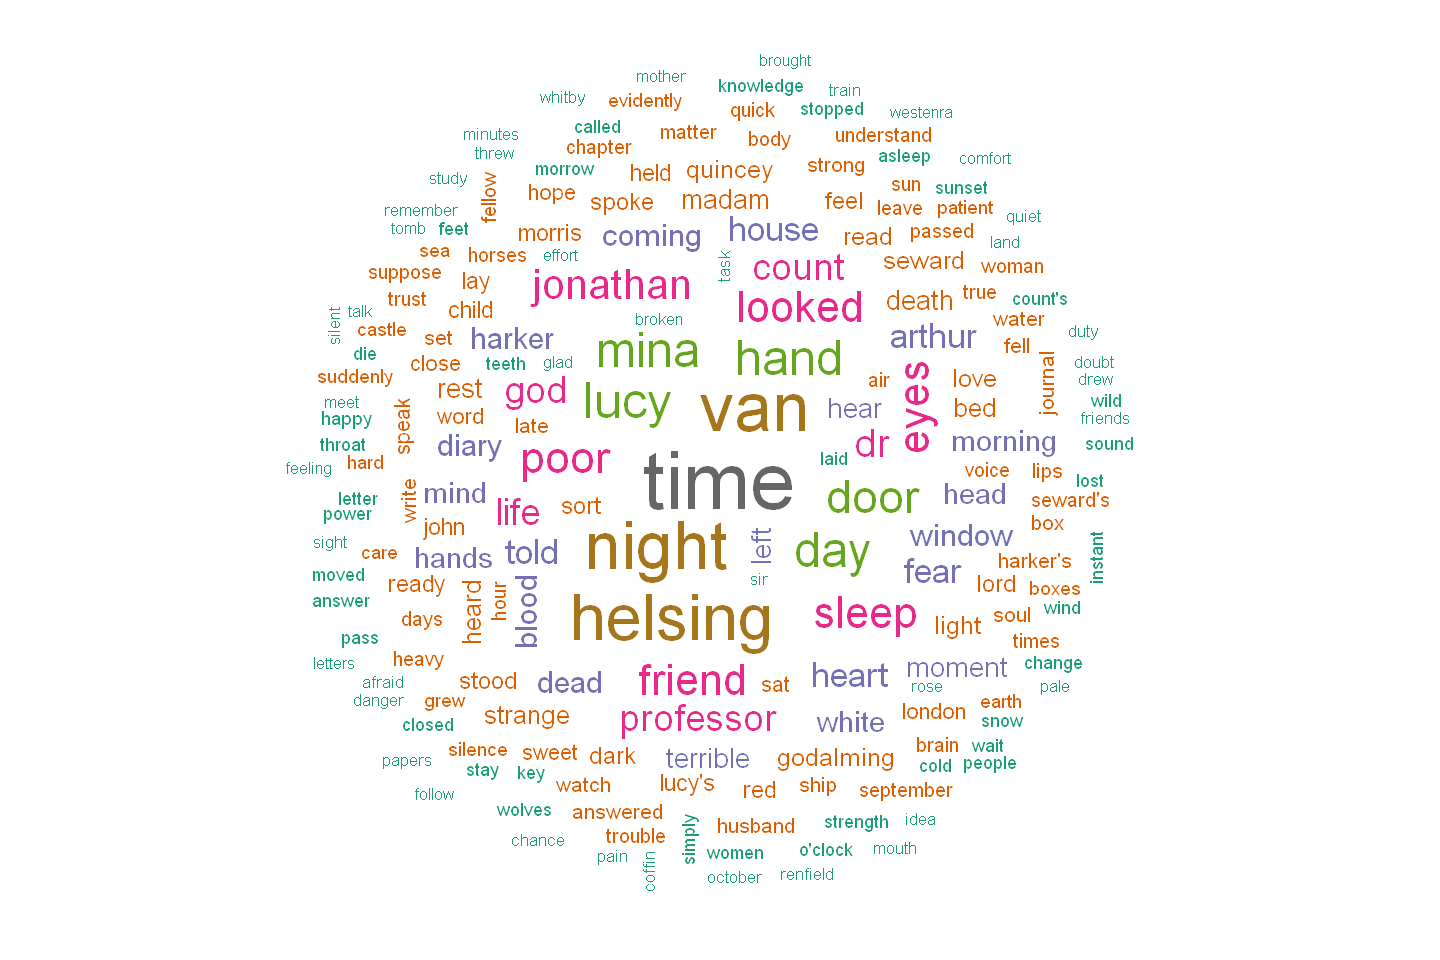

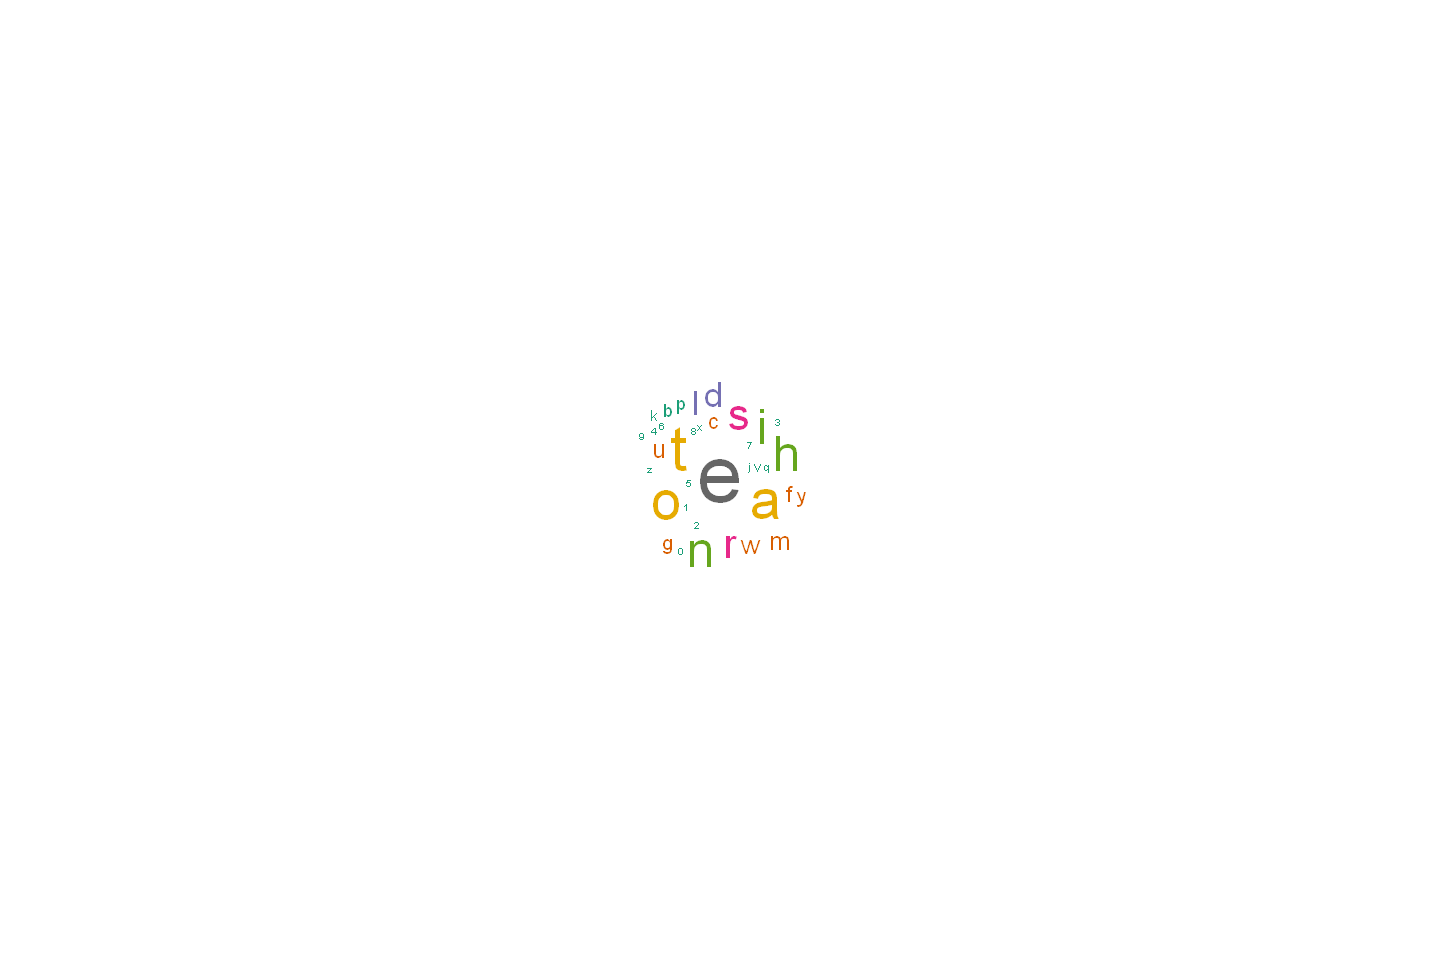

In [31]:
wordcloud(words = sw_palabras$word, freq = sw_palabras$Freq, min.freq = 1,
          max.words=200, random.order=FALSE, colors=brewer.pal(8, "Dark2"))
wordcloud(words = s_letras$letras, freq = s_letras$Freq, min.freq = 1,
          max.words=200, random.order=FALSE, colors=brewer.pal(8, "Dark2"))